In [ ]:
import json
from pathlib import Path

# Hardcoded stats file path (20:17 run)
stats_path = Path("../outputs/sr_rollout/20260206_201755/rollout_stats.json")
with stats_path.open() as f:
    stats = json.load(f)



dict_keys(['Return', 'Horizon', 'Success_Rate', 'Rzz_List'])

-0.07192977167461363


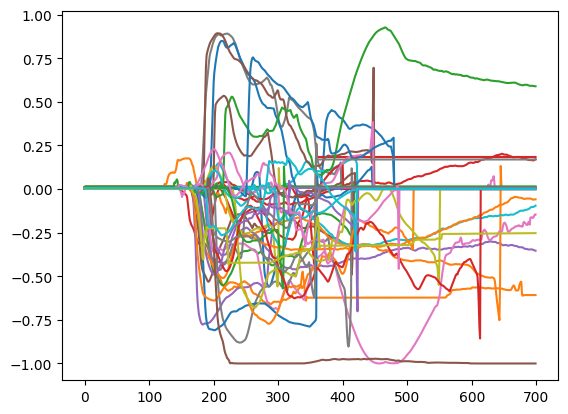

In [47]:
import numpy as np
from matplotlib import pyplot as plt

success = np.array([k['Success_Rate'] for k in stats])
rzz = np.array([np.pad(np.array(k['Rzz_List']), (0,700 - len(k['Rzz_List'])), constant_values=0) for k in stats])

print(np.average(rzz))
plt.plot(rzz.T)
plt.show()


In [86]:
def get_metrics(stats):
    success = np.array([k['Success_Rate'] for k in stats])
    rzz = np.array([np.pad(np.array(k['Rzz_List']), (0,700 - len(k['Rzz_List'])), constant_values=0) for k in stats])[:,150:400]
    
    succes_rate = np.mean(success)
    mean = rzz.mean()
    print(rzz.shape)

    trsh = np.cos(np.deg2rad(45))
    tt_trsh = np.where(np.argmax(rzz>trsh, axis=1) > 0, np.argmax(rzz>trsh, axis=1), rzz.shape[1])
    trsh_violation = 1 - np.sum(rzz>trsh, axis=1) / 300

    return succes_rate, mean, tt_trsh, trsh_violation

In [87]:
succes_rate, mean_rzz, tt_trsh, trsh_violation = get_metrics(stats)
print(f'succes_rate: {succes_rate}\n'
      f'mean_rzz: {mean_rzz}\n'
      f'tt_trsh: {np.mean(tt_trsh)}\n'
      f'trsh_violation {np.mean(trsh_violation)}'
      )

(40, 250)
succes_rate: 0.425
mean_rzz: -0.12415557681460478
tt_trsh: 231.075
trsh_violation 0.9859166666666667
